# Proyek Analisis Data: Air-quality-dataset
- **Nama:** Daniel Darren Richardo
- **Email:** danieldarrenr@gmail.com
- **ID Dicoding:** daniel_darren_richardo_biVg

## Menentukan Pertanyaan Bisnis

- Bagaimana tren rata-rata kualitas udara PM2.5 dari waktu ke waktu?
- Lokasi mana yang memiliki tingkat polusi tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
folder_path = "/content/drive/MyDrive/PRSA_Data_20130301-20170228"
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

df_list = []

for file in file_names:
    path = os.path.join(folder_path, file)
    station = file.split('_')[2]
    df = pd.read_csv(path)
    df["station"] = station
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)
df_all

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**Insight:**
- Dari dataset Air-quality yang ada terdapat 1 folder yang berisi tentang kualitas udara di stasiun Beijing yang terdiri dari 12 stasiun dan dalam rentang waktu 2013-2017
- Dalam dataset tersebut total terdapat 420768 baris dan 18 kolom yang merupakan data kualitas udara di stasiun yang berada di Beijing

### Assessing Data

In [8]:
# Info umum dataset
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   No             420768 non-null  int64         
 1   year           420768 non-null  int64         
 2   month          420768 non-null  int64         
 3   day            420768 non-null  int64         
 4   hour           420768 non-null  int64         
 5   PM2.5          412029 non-null  float64       
 6   PM10           414319 non-null  float64       
 7   SO2            411747 non-null  float64       
 8   NO2            408652 non-null  float64       
 9   CO             400067 non-null  float64       
 10  O3             407491 non-null  float64       
 11  TEMP           420370 non-null  float64       
 12  PRES           420375 non-null  float64       
 13  DEWP           420365 non-null  float64       
 14  RAIN           420378 non-null  float64       
 15  

In [9]:
# Cek missing values
df_all.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [10]:
# Cek duplicates values
print("Jumlah duplikasi: ", df_all.duplicated().sum())
df_all.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime,day_of_week
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000,420768,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711,2015-03-01 11:30:00.000001024,3.000684
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 11:30:00,3.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00,5.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00,6.000000
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386,NaN,2.001200


In [11]:
# Cek unique value per kolom
df_all.nunique()

,0
No,35064
year,5
month,12
day,31
hour,24
PM2.5,888
PM10,1084
SO2,691
NO2,1212
CO,132


**Insight:**
- Dari dataset tersebut pada bagian PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN, wd, dan WSPM terdapat data yang missing karena dari info yang muncul hanya beberapa data saja yang jumlahnya sesuai dengan baris yang ada dari keseluruhan dataset
- dari dataset tersebut terdapat 0 duplicate yang berarti cleaning yang harus kita lakukan bisa fokus untuk memperbaiki data yang missing

### Cleaning Data

In [12]:
cols_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
                 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

In [13]:
# 1. Cek jumlah missing value awal
print("Missing value sebelum cleaning:\n")
print(df_all[cols_to_check].isna().sum())

# 2. Buang rows yang semuanya kosong di kolom-kolom penting
df_all = df_all.dropna(subset=cols_to_check, how='all')

# 3. Untuk kolom numerik: bisa gunakan imputasi median
num_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
            'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in num_cols:
    df_all[col] = df_all[col].fillna(df_all[col].median())

# 4. Untuk kolom kategorikal seperti 'wd', bisa isi dengan modus (nilai paling sering)
df_all['wd'] = df_all['wd'].fillna(df_all['wd'].mode()[0])

# 5. Cek hasil akhir
print("\nMissing value setelah cleaning:\n")
print(df_all[cols_to_check].isna().sum())


Missing value sebelum cleaning:

PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
wd        1822
WSPM       318
dtype: int64

Missing value setelah cleaning:

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64


In [14]:
df_all.describe()
# df_all.info()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime,day_of_week
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.278489,104.256193,15.641507,50.418633,1214.493362,56.981874,13.539885,1010.746658,2.491405,0.064416,1.729461,2015-03-01 11:30:00.000001024,3.000684
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 11:30:00,3.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00,5.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00,6.000000
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.056799,91.108745,21.455419,34.642023,1133.542988,55.802413,11.430768,10.469168,13.787252,0.820626,1.245947,NaN,2.001200


**Insight:**
- Data yang missing values sudah dapat diatasi dengan baik dan data yang baru sudah rapih dan siap digunakan
- Distribusi nilai sekarang lebih stabil dan siap untuk dianalisis lebih lanjut, karena tidak ada nilai kosong yang bisa menyebabkan error saat visualisasi atau pemodelan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
# Cek jumlah baris dan kolom
print(f"Jumlah baris dan kolom: {df_all.shape}")

# Cek tipe data dan non-null
df_all.info()


Jumlah baris dan kolom: (420768, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   No             420768 non-null  int64         
 1   year           420768 non-null  int64         
 2   month          420768 non-null  int64         
 3   day            420768 non-null  int64         
 4   hour           420768 non-null  int64         
 5   PM2.5          420768 non-null  float64       
 6   PM10           420768 non-null  float64       
 7   SO2            420768 non-null  float64       
 8   NO2            420768 non-null  float64       
 9   CO             420768 non-null  float64       
 10  O3             420768 non-null  float64       
 11  TEMP           420768 non-null  float64       
 12  PRES           420768 non-null  float64       
 13  DEWP           420768 non-null  float64       
 14  RAIN           

In [16]:
df_all.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime,day_of_week
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.278489,104.256193,15.641507,50.418633,1214.493362,56.981874,13.539885,1010.746658,2.491405,0.064416,1.729461,2015-03-01 11:30:00.000001024,3.000684
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 11:30:00,3.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00,5.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00,6.000000
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.056799,91.108745,21.455419,34.642023,1133.542988,55.802413,11.430768,10.469168,13.787252,0.820626,1.245947,NaN,2.001200


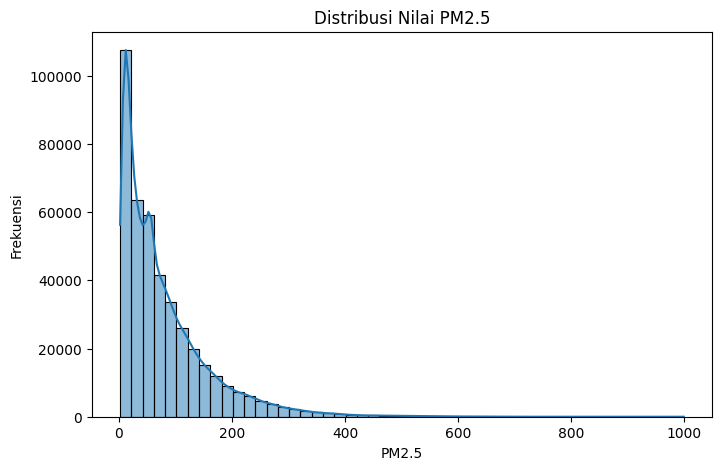

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df_all['PM2.5'], bins=50, kde=True)
plt.title("Distribusi Nilai PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frekuensi")
plt.show()

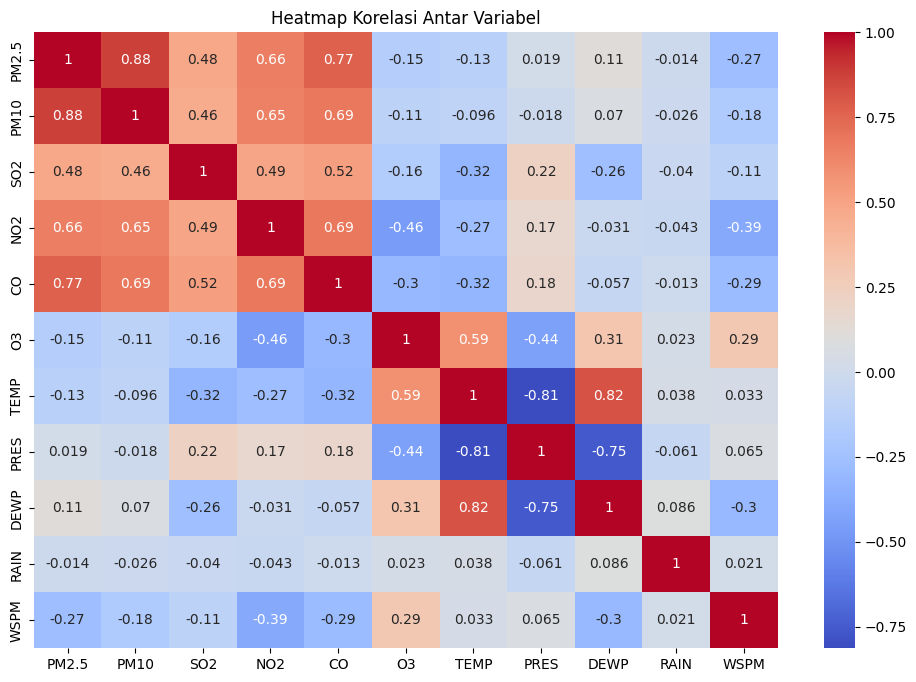

In [18]:
# Korelasi antar kolom numerik
plt.figure(figsize=(12,8))
sns.heatmap(df_all[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
                    'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

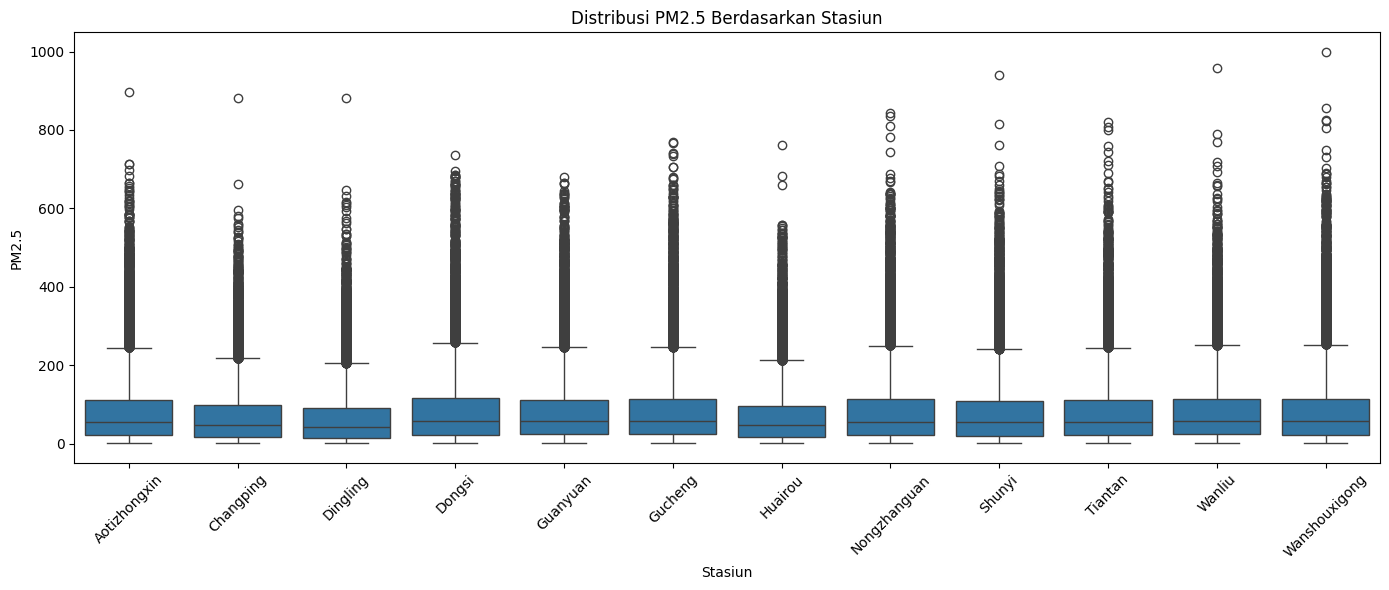

In [19]:
plt.figure(figsize=(14,6))
sns.boxplot(x='station', y='PM2.5', data=df_all)
plt.title("Distribusi PM2.5 Berdasarkan Stasiun")
plt.xlabel("Stasiun")
plt.ylabel("PM2.5")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Distribusi PM2.5 terlihat right-skewed (banyak nilai rendah, tapi ada outlier yang tinggi).
- Beberapa stasiun punya sebaran PM2.5 yang jauh lebih tinggi dari yang lain, menunjukkan adanya hotspot polusi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

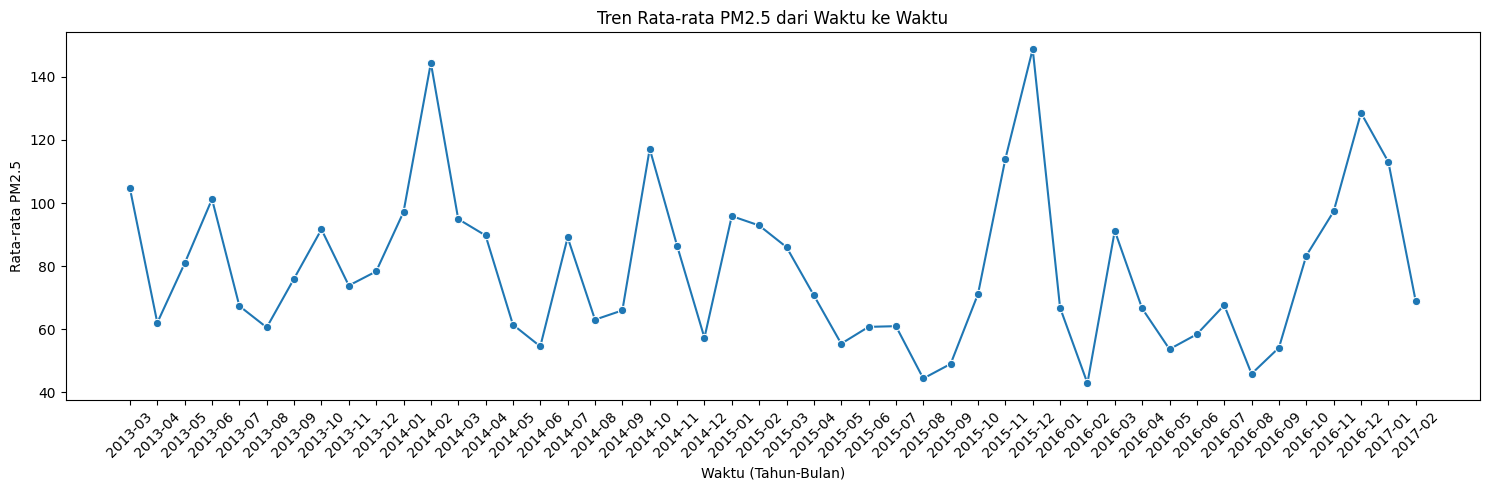

In [20]:
# Pastikan kolom 'datetime' sudah dalam format datetime
df_all['datetime'] = pd.to_datetime(df_all[['year', 'month', 'day', 'hour']])

# Pertanyaan 1: Trend PM2.5 dari waktu ke waktu (agregasi bulanan)
df_all['month_year'] = df_all['datetime'].dt.to_period('M')
pm25_trend = df_all.groupby('month_year')['PM2.5'].mean().reset_index()
pm25_trend['month_year'] = pm25_trend['month_year'].astype(str)

plt.figure(figsize=(15,5))
sns.lineplot(data=pm25_trend, x='month_year', y='PM2.5', marker='o')
plt.title('Tren Rata-rata PM2.5 dari Waktu ke Waktu')
plt.xlabel('Waktu (Tahun-Bulan)')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pertanyaan 2:

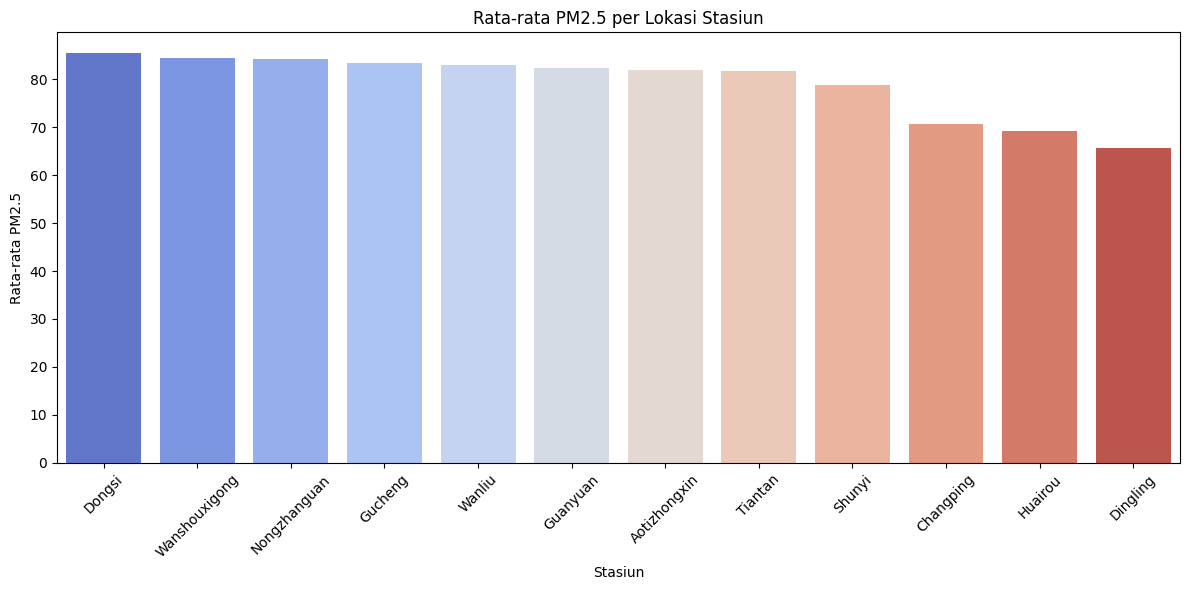

📌 Lokasi dengan PM2.5 tertinggi: Dongsi (85.53)
📌 Lokasi dengan PM2.5 terendah : Dingling (65.75)


In [21]:
# Pertanyaan 2: Lokasi dengan tingkat PM2.5 tertinggi dan terendah
pm25_by_station = df_all.groupby('station')['PM2.5'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=pm25_by_station, x='station', y='PM2.5', palette='coolwarm')
plt.title('Rata-rata PM2.5 per Lokasi Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan lokasi tertinggi dan terendah
highest = pm25_by_station.iloc[0]
lowest = pm25_by_station.iloc[-1]
print(f"📌 Lokasi dengan PM2.5 tertinggi: {highest['station']} ({highest['PM2.5']:.2f})")
print(f"📌 Lokasi dengan PM2.5 terendah : {lowest['station']} ({lowest['PM2.5']:.2f})")


**Insight:**
- Ada tren peningkatan yang signifikan dari bulan 9 ke bulan 1 setiap tahun nya, mungkin karena pengaruh musim dan cuaca
- Lokasi Dongsi memiliki rata-rata PM2.5 tertinggi, menandakan area ini punya tingkat polusi lebih berat (mungkin area industri atau lalu lintas tinggi).

## Analisis Lanjutan (Opsional)

   season      PM2.5 AirQualityCategory
3  Winter  94.681107   Lightly Polluted
1  Spring  76.501006   Lightly Polluted
2  Summer  64.463736               Good
0  Autumn  81.788375   Lightly Polluted


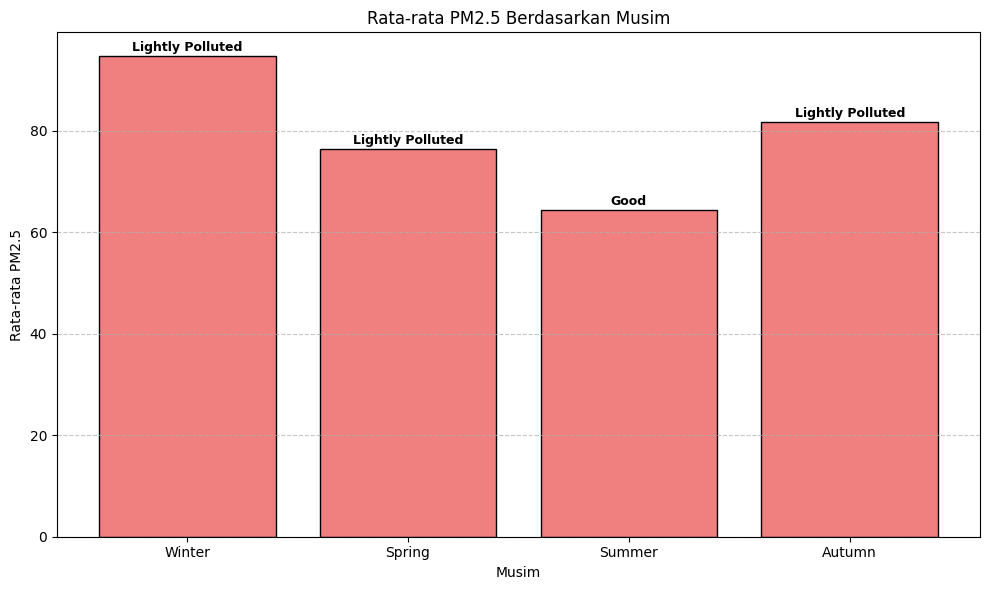

In [34]:
"""
Manual Grouping untuk menentukan kualitas PM2.5 Berdasarkan season
"""
# 1. Hitung rata-rata PM2.5 per musim
avg_pm25_per_season = df_all.groupby('season')['PM2.5'].mean().reset_index()

# 2. Klasifikasi kualitas udara berdasarkan rata-rata PM2.5
def categorize_air_quality(pm25):
    if pm25 <= 35:
        return "Excellent"
    elif pm25 <= 75:
        return "Good"
    elif pm25 <= 115:
        return "Lightly Polluted"
    elif pm25 <= 150:
        return "Moderately Polluted"
    elif pm25 <= 250:
        return "Heavily Polluted"
    else:
        return "Severely Polluted"

avg_pm25_per_season['AirQualityCategory'] = avg_pm25_per_season['PM2.5'].apply(categorize_air_quality)

# 3. Urutkan musim sesuai urutan logis
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
avg_pm25_per_season['season'] = pd.Categorical(avg_pm25_per_season['season'], categories=season_order, ordered=True)
avg_pm25_per_season = avg_pm25_per_season.sort_values('season')

# 4. Tampilkan hasil
print(avg_pm25_per_season)

# 5. Visualisasi
plt.figure(figsize=(10,6))
plt.bar(avg_pm25_per_season['season'], avg_pm25_per_season['PM2.5'], color='lightcoral', edgecolor='black')
plt.title("Rata-rata PM2.5 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata PM2.5")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 6. Tambahkan kategori kualitas udara di atas bar
for idx, row in avg_pm25_per_season.iterrows():
    plt.text(row['season'], row['PM2.5'] + 1, row['AirQualityCategory'], ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


Conclusion

- Mayoritas season masuk dalam kategori Lightly Polluted, namun terdapat satu season yaitu **summer** yang dalam cluster **Good**.
- Kondisi atmosfer saat musim dingin (misalnya inversi suhu atau kelembapan rendah) bisa menyebabkan penumpukan polutan seperti PM2.5, karena pergerakan udara yang lambat. Sehingga musim **winter** seperti yang dapat dilihat merupakan yang tergolong memiliki PM2.5 paling tinggi, meskipun masih dalam kategori lightly polluted

## Conclusion

- Berdasarkan grafik tren bulanan, kualitas udara (PM2.5) sangat fluktuatif antar waktu, dengan beberapa puncak signifikan di musim dingin seperti Januari 2014 dan Desember 2015 yang mencapai konsentrasi PM2.5 di atas 140. Ini mengindikasikan bahwa terdapat musim tertentu yang konsisten memiliki tingkat polusi tinggi, kemungkinan besar dipengaruhi oleh faktor cuaca dan aktivitas manusia (misalnya pemanasan rumah tangga di musim dingin).
- Stasiun Dongsi tercatat sebagai lokasi dengan tingkat polusi tertinggi, dengan rata-rata PM2.5 sebesar 85.53, yang mengindikasikan area dengan beban pencemaran tinggi dan mungkin aktivitas urban padat. Stasiun Dingling memiliki tingkat PM2.5 terendah, dengan rata-rata 65.75, yang menunjukkan bahwa area ini memiliki kualitas udara yang relatif lebih baik.